*Data Science Course - Telkom Digital Talent Incubator*


---




# **Clustering**

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Here we model the clustering from customer income and spend data. We use this model to perform customer segmentation. We differentiate customers into the optimum number of groups based on their shared income and spend.

### **Import Libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Dataset**

In [37]:
# Import Dataset
df_income = pd.read_csv('https://raw.githubusercontent.com/ibalm9/clustering/main/dataset/Mall_Customers.csv')
df_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Prints the Dataset Information
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Prints Descriptive Statistics
df_income.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### **Data Preprocessing**

First, we standardize the data to equalize the range and/or data variability. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 

In [34]:
df_income['Gender'] = df_income['Gender'].map({
    "Male" : 1,
    "Female" : 0
})

In [35]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_income.columns.tolist()
df_income[column_names] = scaler.fit_transform(df_income[column_names])
df_income.sort_index(inplace=True)
df_income

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100),cluster
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,1.682005
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,-0.797609
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,1.682005
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,-0.797609
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,1.682005
...,...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061,0.855467
196,1.671450,-0.886405,0.441365,2.497807,-0.861839,-1.624147
197,1.688771,1.128152,-0.491602,2.497807,0.923953,0.855467
198,1.706091,1.128152,-0.491602,2.917671,-1.250054,-1.624147


In [27]:
df_income.columns = [c.replace(' ', '_') for c in df_income.columns]

In [19]:
df_income = df_income[['Annual_Income_(k$)','Spending_Score_(1-100)']].copy()

### **Data Visualization**

Text(0, 0.5, 'Annual Spend')

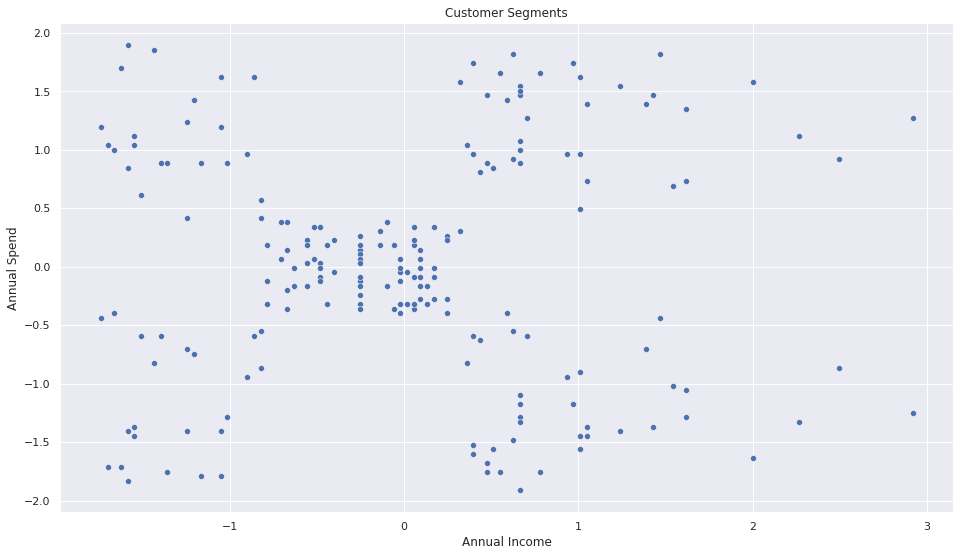

In [12]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', data=df_income)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

## **K-Means Clustering**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

### **Search for the Optimum Number of Clusters (k)**

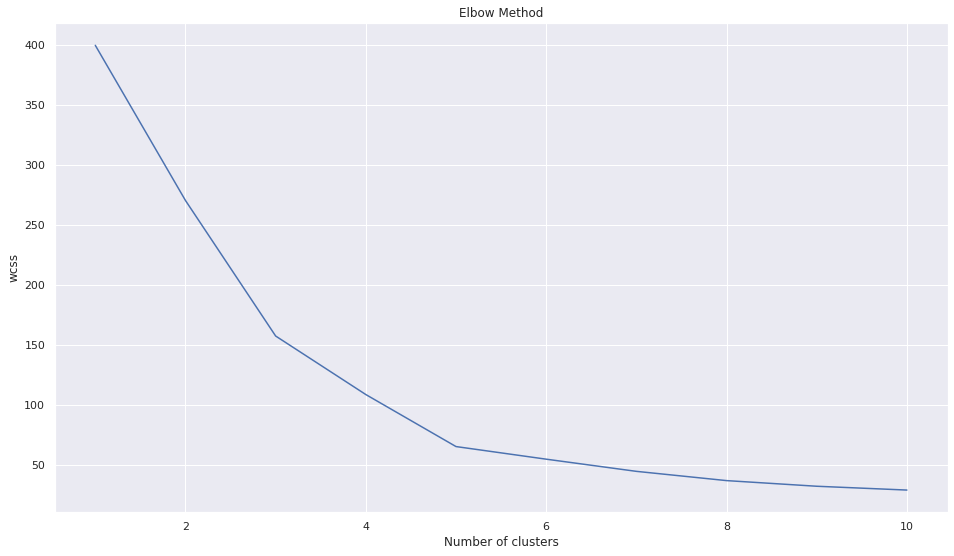

In [20]:
# Transform Data Frame to Numpy Array
income = df_income.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29512063001659344
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5394911417553498
For n_clusters=7, The Silhouette Coefficient is 0.5281492781108291
For n_clusters=8, The Silhouette Coefficient is 0.45644093438859246
For n_clusters=9, The Silhouette Coefficient is 0.45805265701012743
For n_clusters=10, The Silhouette Coefficient is 0.4428503995503446


###K Optimum = 5

### **Modeling K-Means**

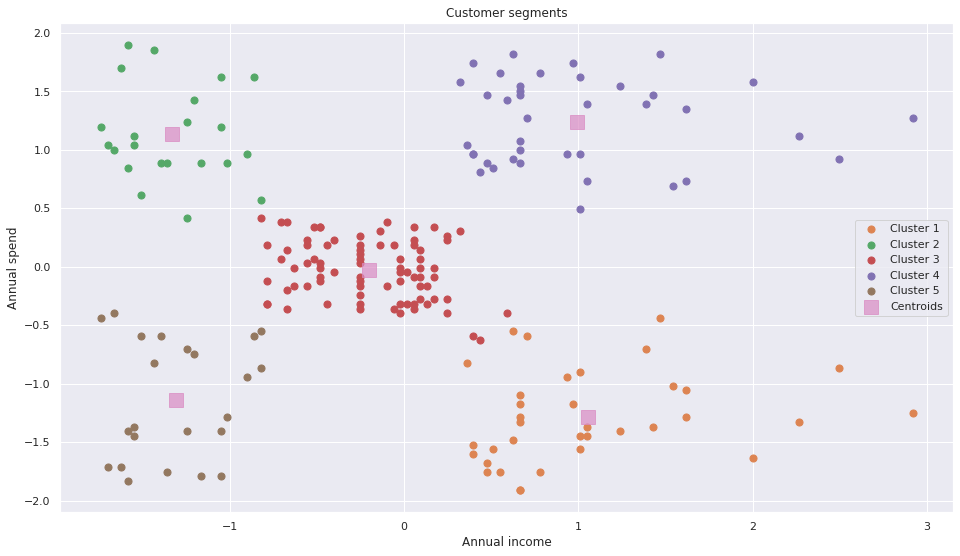

In [22]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=5
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', data=df_income)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[cluster == 4, 0], income[cluster == 4, 1], s = 50, label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [38]:
# Add Cluster Information to the Raw Data
df_income['cluster'] = cluster
df_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [39]:
# Save= Result
df_income.to_csv('income_clusters.csv', index=False)

## **Hierarchical Clustering**

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

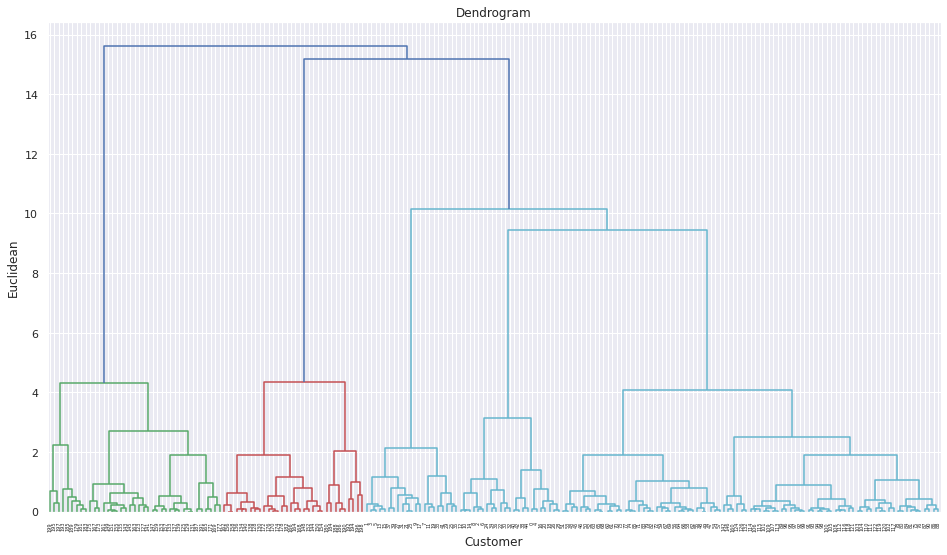

In [25]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

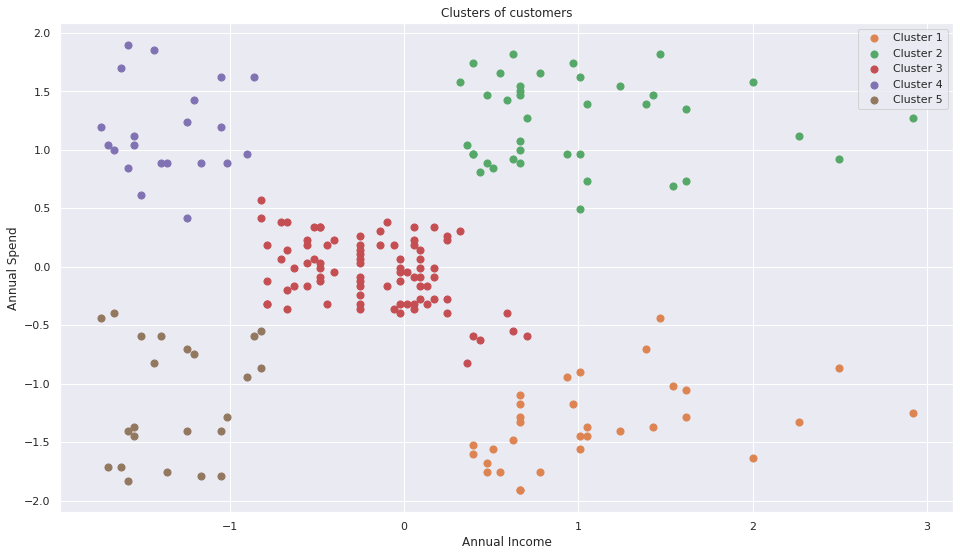

In [36]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)


sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', data=df_income)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[hcluster == 3, 0], income[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[hcluster == 4, 0], income[hcluster == 4, 1], s = 50, label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()